<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/Neural-Net-Classification-Tensorflow-/blob/main/NN_Classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NN Classification

types
* binary classification
* Multiclass Classification
* Multilevel Classification

#creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles
# make 1000 data
n_samples=1000

#create circle
X,y=make_circles(n_samples, noise=0.03,random_state=42) #Make a large circle containing a smaller circle in 2d.#

In [ ]:
X #fratures

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10] #labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

#lets visualize our data

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"labels":y[:]}) #X[:, 0] means "select all rows (:) and only the first column (0)".
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


c=y:

The c parameter determines the color of each point in the scatter plot.
Here, y is a vector (e.g., labels, targets, or any numeric data). Each value in y is mapped to a color, creating a color-coded scatter plot.
This is often used to visualize classification or regression results.

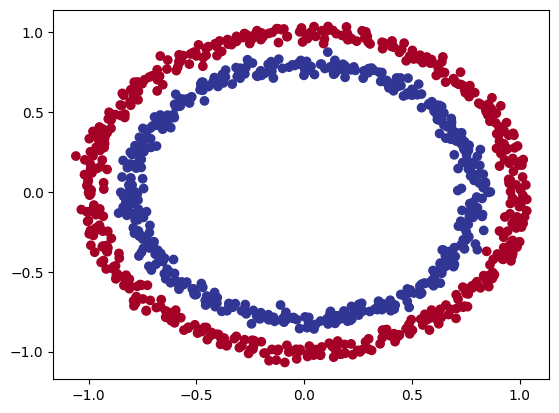

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu) #X[:, 0] means "select all rows (:) and only the first column (0)".

#input output shape

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#number of samples
len(X),len(y)

(1000, 1000)

In [ ]:
# viewing our first feature and label
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:

#create a model
import tensorflow as tf
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.fit(X,y,epochs=5,verbose=1)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4981 - loss: 6.5987
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5007 - loss: 6.5838 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5003 - loss: 6.5701 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5010 - loss: 6.5420 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4991 - loss: 6.5168 


lets train for longer

In [ ]:
#create a model
import tensorflow as tf
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=200,verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4434 - loss: 0.7465


[0.7308583855628967, 0.47600001096725464]

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
history=model_3.fit(X,y,epochs=100,verbose=0)


In [ ]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 0.6938  


[0.6946933269500732, 0.5]

Text(0.5, 0, 'epochs')

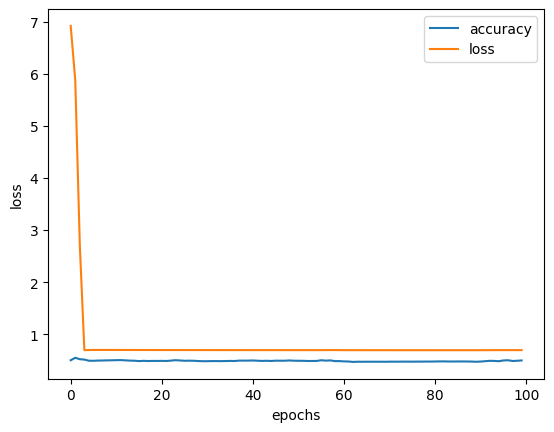

In [ ]:
# plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#creating fnuction to visualize model prediction

In [ ]:
import numpy as np
def plot_prediction(model,X,y):
  #define axis boundary of the plot and create meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1

  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  #create X values. we are going to make prediction on these
  X_in=np.c_[xx.ravel(),yy.ravel()]

  #make prediction
  y_pred=model.predict(X_in)

  if(y_pred[0]>1):
    print("multiclass")
    # we have to reshape our model to make them ready to plot
    y_pred= np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape) #If predictions are probabilities (e.g., between 0 and 1), they are rounded to 0 or 1 using np.round.

  #plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7) #plt.contourf creates a filled contour plot where regions are colored according to y_pred.
  #alpha=0.7 adjusts the transparency.

  plt.scatter(X[:,0],X[:,1],c=y,s=40, cmap=plt.cm.RdYlBu) #s=40 specifies the size of the points.
  plt.xlim(xx.min(),xx.max()) #Sets the limits of the plot to match the meshgrid boundaries.
  plt.ylim(yy.min(),yy.max())


xx.ravel() and yy.ravel() flatten the grid into a 1D array.
np.c_ combines the flattened x and y coordinates into a 2D array of shape (10000, 2) (each row is a pair of x and y values).
X_in is the grid of all points where the model will make predictions.


arr = np.array([[1, 2, 3], [4, 5, 6]])

flattened_arr = np.ravel(arr)

print(flattened_arr)  # Output: [1 2 3 4 5 6]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
binary classification


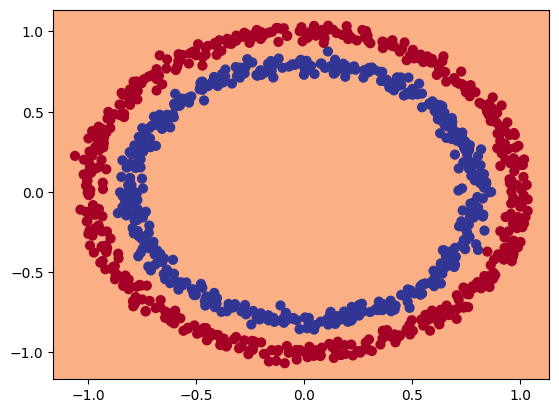

In [ ]:
plot_prediction(model=model_3,X=X,y=y)

#using non linear activation function

In [ ]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history=model_4.fit(X,y,epochs=100,verbose=0)


In [ ]:
model_4.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4307 - loss: 4.2093  


[3.93062424659729, 0.4749999940395355]

In [ ]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
history=model_5.fit(X,y,epochs=500,verbose=0)


In [ ]:
model_5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5045 - loss: 7.8989  


[7.971191883087158, 0.5]

<Axes: >

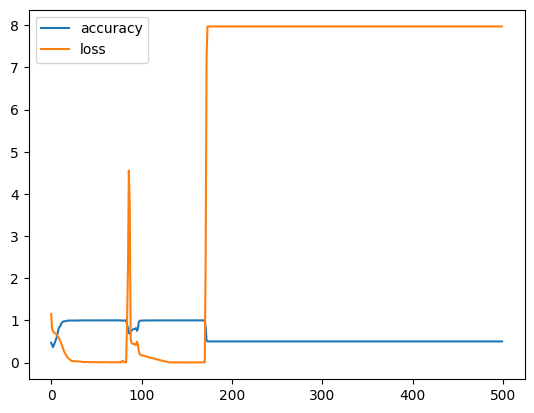

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
   tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
history_6=model_6.fit(X,y,epochs=100,verbose=0)


In [ ]:
model_6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

<Axes: >

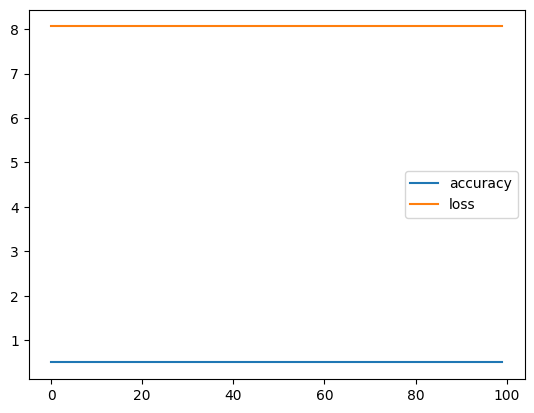

In [ ]:
pd.DataFrame(history_6.history).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


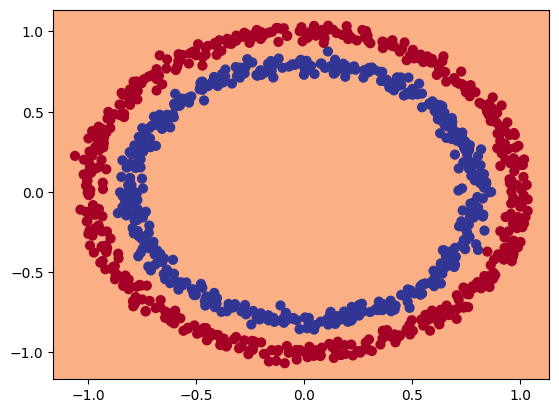

In [ ]:
plot_prediction(model=model_6,X=X,y=y)

In [ ]:
tf.random.set_seed(42)

model_7=tf.keras.Sequential([
   tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
history_7=model_7.fit(X,y,epochs=100,verbose=0)


In [ ]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9784 - loss: 0.0705  


[0.06372522562742233, 0.9800000190734863]

<Axes: >

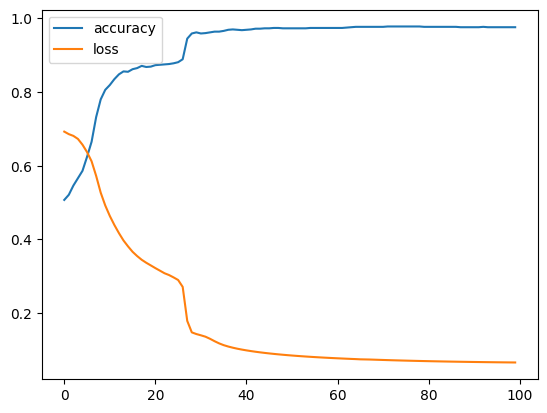

In [ ]:
pd.DataFrame(history_7.history).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
binary classification


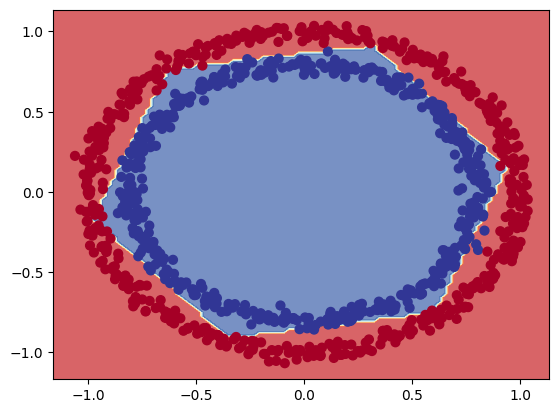

In [ ]:
plot_prediction(model_7,X,y)

In [ ]:
A=tf.constant(np.arange(-10,10,0.5))
A

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5])>

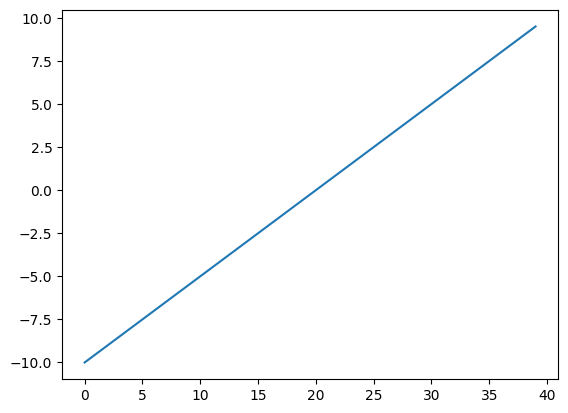

In [ ]:
plt.plot(A)

In [ ]:
def sigmoid_activation_function(x):
  return 1/(1+tf.exp(x))


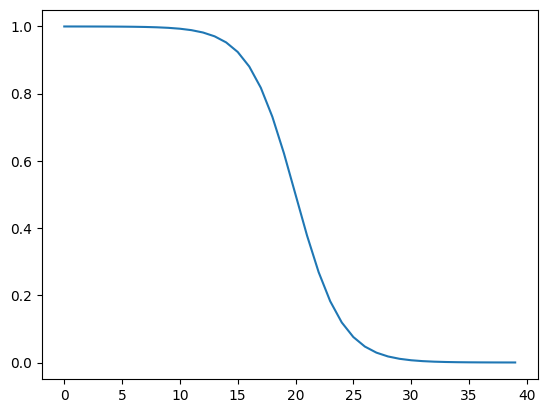

In [ ]:
plt.plot(sigmoid_activation_function(A))

In [ ]:
def relu(x):
  return tf.maximum(0,x)


In [ ]:
relu(A)

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. , 1.5, 2. , 2.5,
       3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. ,
       9.5])>

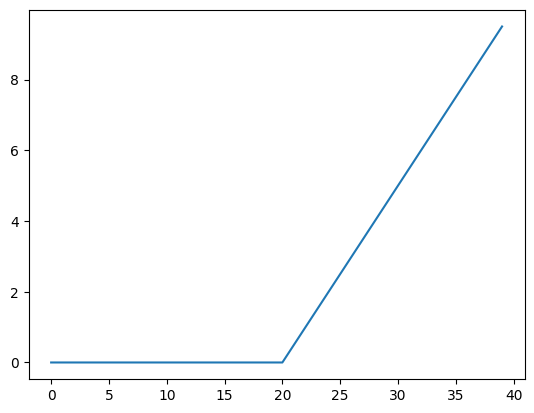

In [ ]:
plt.plot(relu(A))

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5])>

No change. returns the input unmodified.

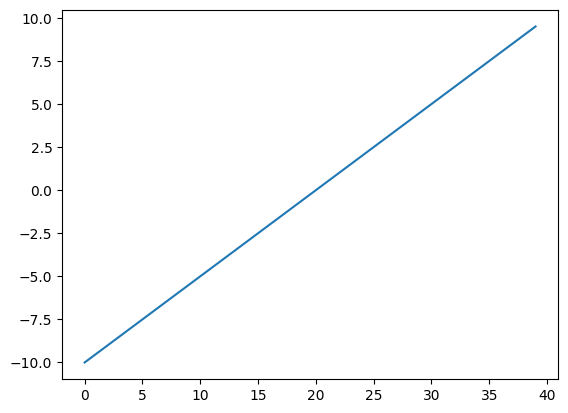

In [ ]:
plt.plot(tf.keras.activations.linear(A))

Splitting our original dataaset into train and test set

In [ ]:
x_train,y_train=X[:800],y[:800]
x_test,y_test=X[800:],y[800:]
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
# crate a model
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation="sigmoid")])
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_8=model_8.fit(x_train,y_train,epochs=50)

In [ ]:
model_8.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9806 - loss: 0.0296  


[0.026375675573945045, 0.9850000143051147]

#plotting train vs test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


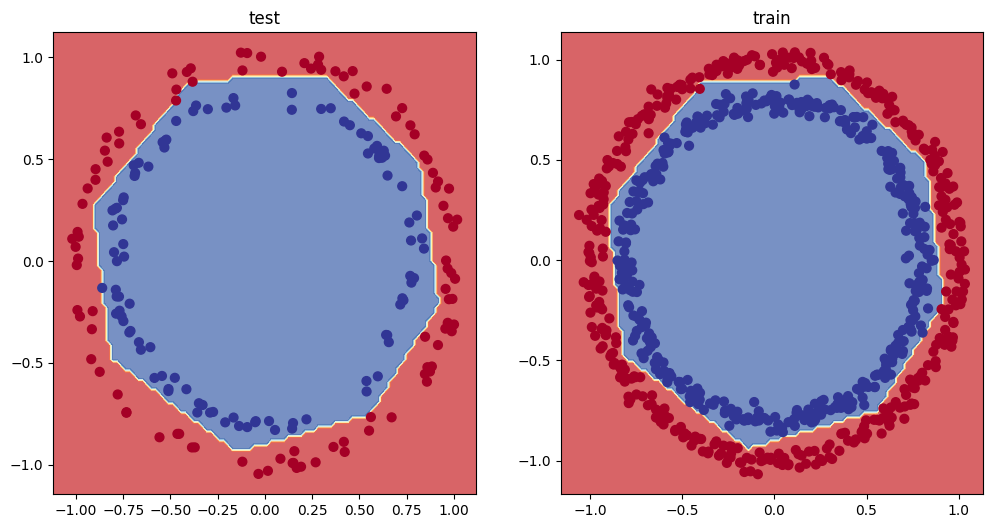

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("test")
plot_prediction(model=model_8,X=x_test,y=y_test)
plt.subplot(1,2,2)
plt.title("train")
plot_prediction(model=model_8,X=x_train,y=y_train)

# finding best learning rate by learning rate callback

A learning rate scheduler dynamically adjusts the learning rate during training based on the epoch number or other conditions. The goal is to find an optimal learning rate that can improve convergence and avoid issues like overshooting the minimum loss.

LearningRateScheduler:
This callback allows you to adjust the learning rate at the beginning of each epoch.
It takes a function as input, where the function defines how the learning rate changes based on the current epoch.


In Python, a *lambda* is a way to create a small, anonymous function (a function without a name). It's often used when you need a short function for a specific task and don't want to define a full def function.

lambda: The keyword for defining the function.
arguments: Input(s) to the function (just like parameters in a regular function).
expression: The computation or value the function returns. It must be a single line.


In [ ]:
tf.random.set_seed(42)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#create a learning rate callback

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

# fit the model passing lr_scheduler callback
history_9=model_9.fit(x_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5139 - loss: 0.6923 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5104 - loss: 0.6922 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5159 - loss: 0.6920 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5156 - loss: 0.6918 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5147 - loss: 0.6916 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5193 - loss: 0.6914 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5221 - loss: 0.6912 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5157 - loss: 0.6910 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5241 - loss: 0.6907 - learning_

<Axes: >

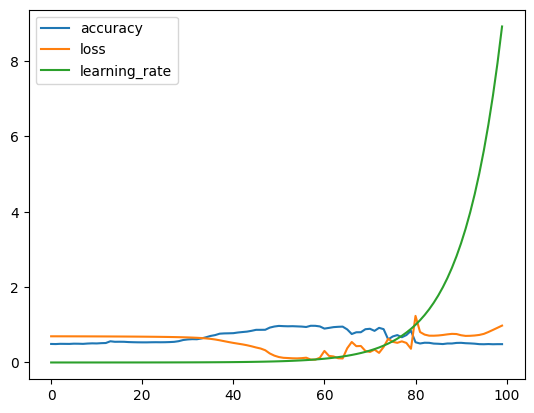

In [ ]:
pd.DataFrame(history_9.history).plot()

plot the learning rate vs loss

In [ ]:
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
lrs=1e-4*(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'learning vs loss')

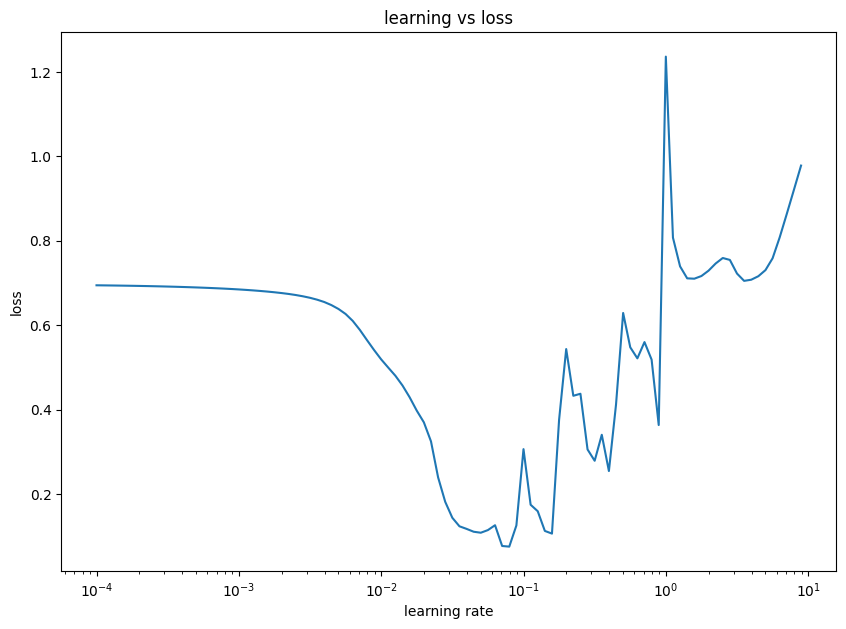

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning vs loss")

lets chage the learning rate now

In [ ]:
# crate a model
tf.random.set_seed(42)
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation="sigmoid")])
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.06),
                metrics=["accuracy"])

history_10=model_10.fit(x_train,y_train,epochs=40,verbose=0)

In [ ]:
model_10.evaluate(x_test,y_test
                  )

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.0860  


[0.08899674564599991, 0.9599999785423279]

Conclusion: by seeing the learning rate vs loss graph. we set the learning rate which have less loss and even with less epochs than model 8. it perform better than model 8

In [ ]:
model_8.evaluate(x_test,y_test
                  )

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0296 


[0.026375675573945045, 0.9850000143051147]

# confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_10=model_10.predict(x_test)
confusion_matrix(y_test,y_pred_10)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_pred_10[:10]

array([[7.5296491e-01],
       [9.9844885e-01],
       [9.8919427e-01],
       [9.9844885e-01],
       [3.6567773e-05],
       [8.2859131e-08],
       [9.9624562e-01],
       [2.9570319e-06],
       [9.9844885e-01],
       [1.6344313e-07]], dtype=float32)

lools like our prediction output is in the form of prediction probability form. the standard output from sigmoid or softmax activation function

In [ ]:
9.8561078e-01

0.98561078

In [ ]:
# converting prediction probability in binary format
tf.round(y_pred_10)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test,tf.round(y_pred_10))

array([[101,   0],
       [  8,  91]])

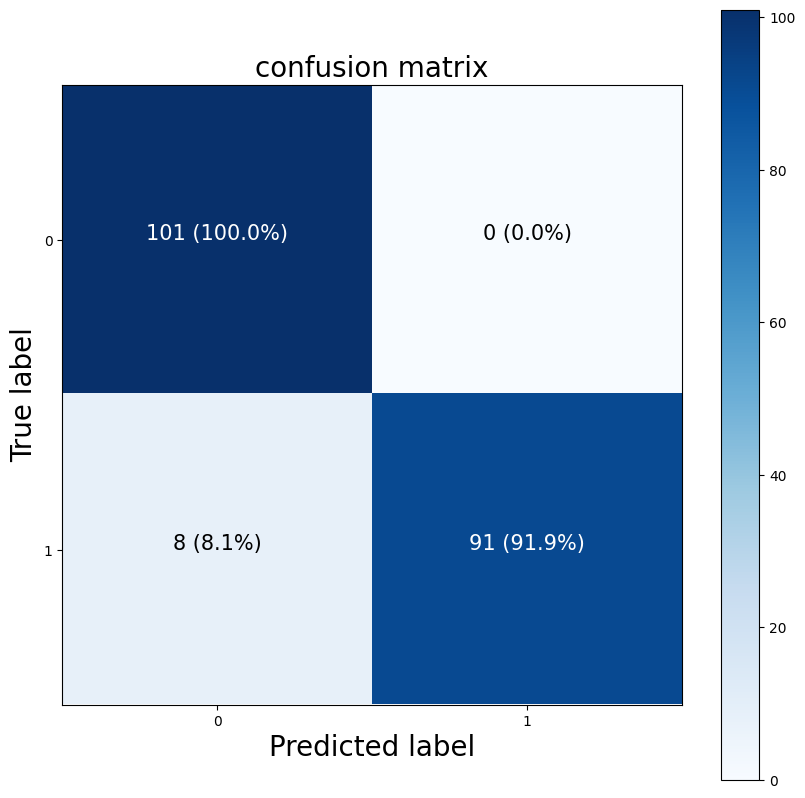

In [ ]:
import itertools

# create confusion matrix
cm=confusion_matrix(y_test,tf.round(y_pred_10))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize confusion matrix, cm.sum(axis=1) computes the sum of each row in the confusion matrix.This gives the total number of samples for each class.
# np.newaxis adds an extra dimension to the array.
cm_classes=cm.shape[0]

fig,ax=plt.subplots(figsize=(10,10))

# create a matrix plot
mat_plot=ax.matshow(cm,cmap=plt.cm.Blues)

fig.colorbar(mat_plot)

#create classes

classes=False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

ax.set(title="confusion matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(cm_classes),
       yticks=np.arange(cm_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x axis label to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#set label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)


# threshold for colors
threshold=(cm.max()+cm.min())/2

#plot the text on each cell

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)



In [ ]:
cm.shape[0]

2

In [ ]:
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize confusion matrix
cm_norm

array([[1.        , 0.        ],
       [0.08080808, 0.91919192]])

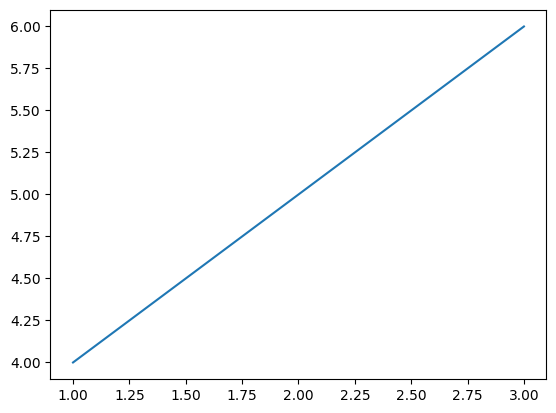

In [ ]:
fig, ax = plt.subplots()  # Create one subplot
ax.plot([1, 2, 3], [4, 5, 6])  # Use the Axes object to plot data

plt.show()

#multi class classification

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels)= fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(f"train sample: {train_data[0]}\n")
print(f"train labels:{train_labels[0]}\n")

train sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

In [ ]:
# check the shape of data and labels
train_data[0].shape,train_labels[0].shape

((28, 28), ())

(<matplotlib.image.AxesImage at 0x7f5231b56a10>,)

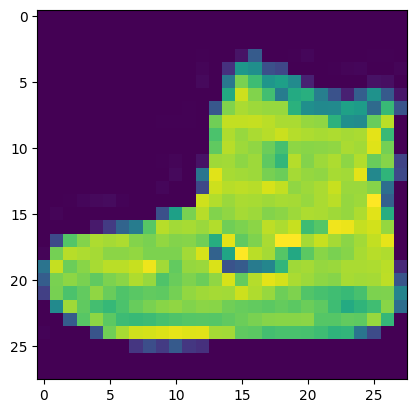

In [ ]:
# lets visualize the train sample
plt.imshow(train_data[0]),

(<matplotlib.image.AxesImage at 0x7f5231ac9d20>, 7)

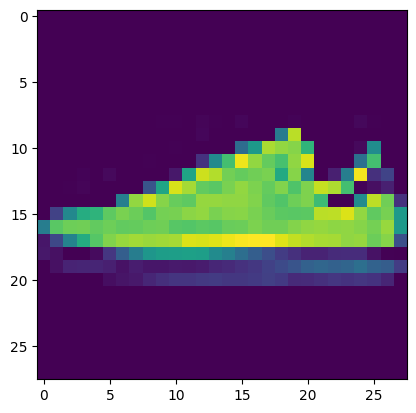

In [ ]:
plt.imshow(train_data[6]),train_labels[6]

In [ ]:
# create a list of human redable labels
labels_name=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
labels_name[7]

'Sneaker'

Text(0.5, 1.0, 'Coat')

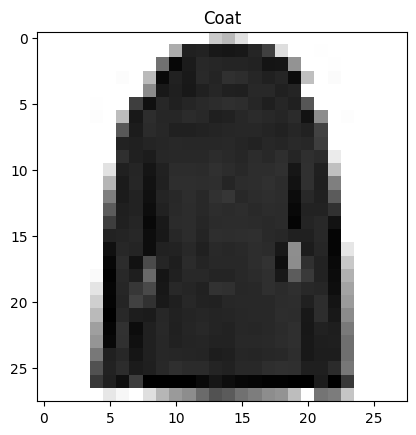

In [ ]:
plt.imshow(train_data[2000],cmap=plt.cm.binary)
plt.title(labels_name[train_labels[2000]])

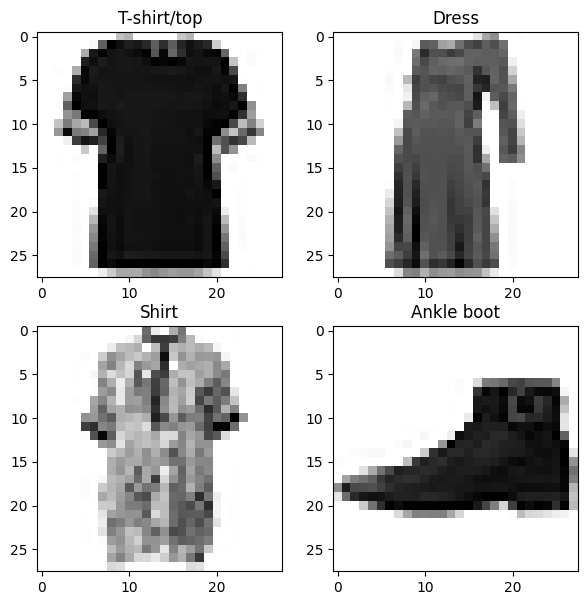

In [ ]:
# plot the multiple random data to visualize
import random
plt.figure(figsize=(7,7))
for i in range(4):
  plt.subplot(2,2,i+1)
  random_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index],cmap=plt.cm.binary)
  plt.title(labels_name[train_labels[random_index]])
  plt.axes=False


# Building a multi class classification model. we need to change few things



1.   Input shape=28x28 (shape of input image)
2.   output shape=10 (one per each class)
3.   Loss function: tf.keras.losses.categoricalCrossEntropy()
4.   output layer activation: Softmax(not sigmoid)


**NOTE** if your labels are one hot encoded, use CategoricalCrossEntropy().if your labels are integer form use SparseCategoricalCrossEntropy()

In [ ]:
# set random seed
tf.random.set_seed(42)

model_11=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.04),
                 metrics=["accuracy"])

non_normalized_history=model_11.fit(train_data,train_labels,epochs=100,verbose=1,validation_data=(test_data,test_labels))

Epoch 1/100


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 28, 10)

Flattens the input. Does not affect the batch size.


Note: If inputs are shaped (batch,) without a feature axis, then
flattening adds an extra channel dimension and output shape is (batch,1)

In [ ]:
# lets explore the flatten layer
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.input_shape,flatten_model.output_shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


((None, 28, 28), (None, 784))

In [ ]:
# set random seed
tf.random.set_seed(42)

model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_normalized_history=model_11.fit(train_data,
                                    tf.one_hot(train_labels,depth=10), #train_label for sparse categorical
                                    epochs=100,verbose=1,validation_data=(test_data,
                                                                          tf.one_hot(test_labels,depth=10)
                                                                          ))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0990 - loss: 2.5891 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1031 - loss: 2.2945 - val_accuracy: 0.2076 - val_loss: 2.0299
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2052 - loss: 1.8886 - val_accuracy: 0.2443 - val_loss: 1.7389
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2527 - loss: 1

In [ ]:
model_11.summary(
)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
#normalizing train ans test dataset
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [ ]:
train_data_norm.max(),train_data_norm.min()

(1.0, 0.0)

In [ ]:
# set random seed
tf.random.set_seed(42)

model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

normalized_history=model_11.fit(train_data_norm,
                                    tf.one_hot(train_labels,depth=10), #train_label for sparse categorical
                                    epochs=100,verbose=1,validation_data=(test_data_norm,
                                                                          tf.one_hot(test_labels,depth=10)
                                                                          ))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4636 - loss: 1.4722 - val_accuracy: 0.6933 - val_loss: 0.9075
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7198 - loss: 0.8564 - val_accuracy: 0.7333 - val_loss: 0.7767
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7421 - loss: 0.7457 - val_accuracy: 0.7481 - val_loss: 0.7208
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7562 - loss: 0.6920 - val_accuracy: 0.7578 - val_loss: 0.6915
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7636 - loss: 0.6601 - val_accuracy: 0.7637 - val_loss: 0.6710
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7697 - loss: 0.6379 - val_accuracy: 0.7684 - val_loss: 0.6591
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7727 - loss: 0.6230 - val_accuracy: 0.7702 - val_loss: 0.6552
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7794 - loss: 0

we can see the difference in performance between the accuracy just by normalizing the data.

<Axes: title={'center': 'normalized loss curve'}>

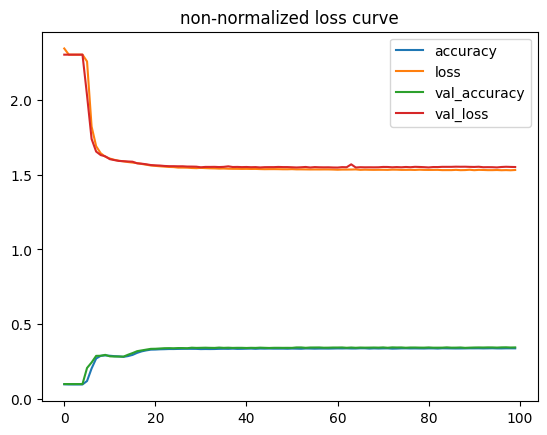

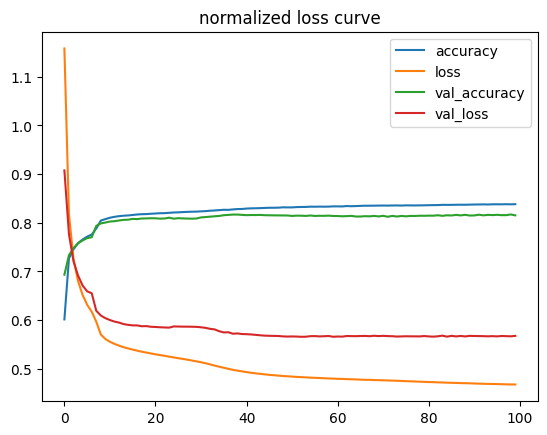

In [ ]:
# plotting the loss curve
import pandas as pd
pd.DataFrame(non_normalized_history.history).plot(title="non-normalized loss curve")
pd.DataFrame(normalized_history.history).plot(title="normalized loss curve")

In [ ]:
#finding ideal learning rate

# set random seed
tf.random.set_seed(42)

model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# create learing rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3* 10**(epoch/20))

find_lr_history=model_12.fit(train_data_norm,
                                    tf.one_hot(train_labels,depth=10), #train_label for sparse categorical
                                    epochs=40,verbose=1,validation_data=(test_data_norm,
                                                                          tf.one_hot(test_labels,depth=10)),callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.2833 - loss: 1.8487 - val_accuracy: 0.5824 - val_loss: 1.1938 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5999 - loss: 1.1138 - val_accuracy: 0.6324 - val_loss: 0.9268 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6520 - loss: 0.8952 - val_accuracy: 0.6887 - val_loss: 0.8391 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7020 - loss: 0.8208 - val_accuracy: 0.7088 - val_loss: 0.7938 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7141 - loss: 0.7825 - val_accuracy: 0.7145 - val_loss: 0.7728 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7177 - loss: 0.7635 - val_accuracy: 0.7136 - val_loss: 0.7597 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7157 - l

Text(0.5, 1.0, 'finding the idle learning rate')

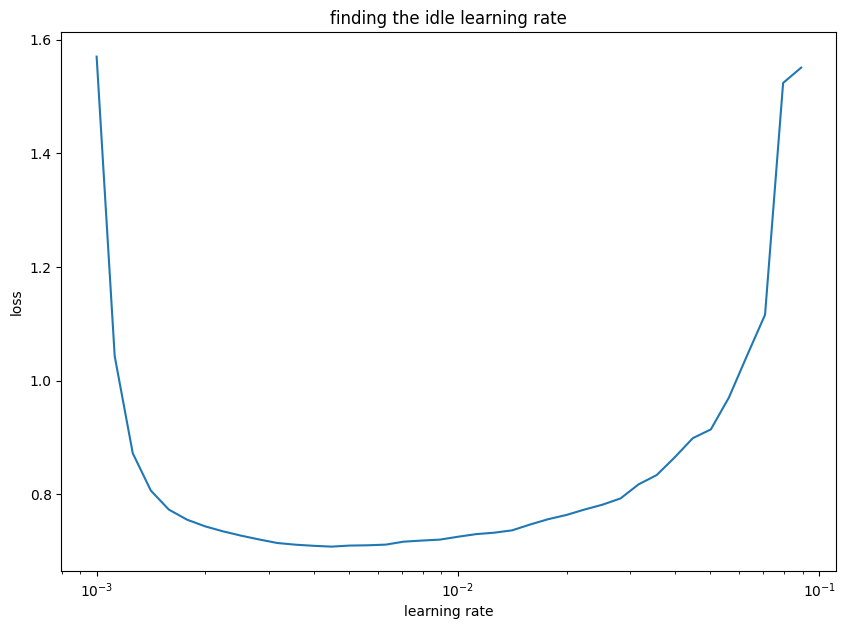

In [ ]:
plt.figure(figsize=(10,7))
lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding the idle learning rate")

In [ ]:
# retrain by the best learning rate

# set random seed
tf.random.set_seed(42)

model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.004),
                 metrics=["accuracy"])
# create learing rate callback

find_lr_history=model_13.fit(train_data_norm,
                                    tf.one_hot(train_labels,depth=10), #train_label for sparse categorical
                                    epochs=40,verbose=1,validation_data=(test_data_norm,
                                                                          tf.one_hot(test_labels,depth=10)))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4236 - loss: 1.4405 - val_accuracy: 0.6744 - val_loss: 0.8037
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6784 - loss: 0.8018 - val_accuracy: 0.7340 - val_loss: 0.7347
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7341 - loss: 0.7314 - val_accuracy: 0.7549 - val_loss: 0.7002
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7534 - loss: 0.6964 - val_accuracy: 0.7557 - val_loss: 0.6845
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7606 - loss: 0.6762 - val_accuracy: 0.7612 - val_loss: 0.6783
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7655 - loss: 0.6631 - val_accuracy: 0.7619 - val_loss: 0.6774
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7692 - loss: 0.6528 - val_accuracy: 0.7665 - val_loss: 0.6710
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7729 - loss: 0.6457 

In [ ]:
#create confusion matrix

import itertools
from sklearn.metrics import confusion_matrix
# create confusion matrix function

def plot_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  cm=confusion_matrix(y_true,y_pred)
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize confusion matrix, cm.sum(axis=1) computes the sum of each row in the confusion matrix.This gives the total number of samples for each class.
  # np.newaxis adds an extra dimension to the array.
  cm_classes=cm.shape[0]

  fig,ax=plt.subplots(figsize=(10,10))

  # create a matrix plot
  mat_plot=ax.matshow(cm,cmap=plt.cm.Blues)

  fig.colorbar(mat_plot)

  #create classes

  classes=False

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  ax.set(title="confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(cm_classes),
        yticks=np.arange(cm_classes),
        xticklabels=labels,
        yticklabels=labels)

  # set x axis label to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #set label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  # threshold for colors
  threshold=(cm.max()+cm.min())/2

  #plot the text on each cell

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=text_size)



In [ ]:
#lets make some prediction now
y_prediction_probabilities=model_13.predict(test_data_norm)
y_prediction_probabilities

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.1653404e-20, 3.4891470e-15, 5.4172027e-30, ..., 1.2303484e-01,
        7.3278510e-12, 8.0789053e-01],
       [9.5177211e-06, 2.4993815e-13, 8.7020147e-01, ..., 1.3691559e-06,
        1.0682225e-03, 8.9726152e-12],
       [2.8119604e-03, 9.8985785e-01, 6.1096734e-06, ..., 3.3896067e-04,
        2.1091285e-03, 1.1771442e-06],
       ...,
       [1.0234370e-02, 2.3734830e-03, 5.6931458e-02, ..., 6.4072036e-04,
        4.0132424e-01, 5.6281475e-08],
       [2.7383107e-03, 9.9078906e-01, 4.9891960e-06, ..., 2.5421660e-04,
        1.3789078e-03, 1.0093491e-06],
       [2.7739408e-12, 8.7355851e-04, 6.0532461e-18, ..., 2.4251335e-03,
        2.5732932e-04, 1.0223819e-05]], dtype=float32)

In [ ]:
1.1653404e-20

1.1653404e-20

In [ ]:
y_prediction_probabilities[0], # this gives the probability of each class. from each output neural network. we have to find maximum

(array([1.1653404e-20, 3.4891470e-15, 5.4172027e-30, 0.0000000e+00,
        0.0000000e+00, 6.9074571e-02, 2.8376166e-32, 1.2303484e-01,
        7.3278510e-12, 8.0789053e-01], dtype=float32),)

In [ ]:
tf.argmax(y_prediction_probabilities[0]),

(<tf.Tensor: shape=(), dtype=int64, numpy=9>,)

In [ ]:
y_prediction_probabilities[0].argmax()

9

In [ ]:
labels_name[tf.argmax(y_prediction_probabilities[0])]

'Ankle boot'

For a 2D tensor, tf.argmax(input, axis=1) will return the indices of the maximum values for each row.

In [ ]:
# converting our prediction probability into integers
y_preds=tf.argmax(y_prediction_probabilities,axis=1)
y_preds[:10]


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])>

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[698,   6,  12, 151,  10,   0, 112,   1,  10,   0],
       [  9, 933,   1,  41,   3,   0,   9,   0,   4,   0],
       [ 24,   1, 455,  21, 267,   0, 226,   0,   6,   0],
       [ 32,  62,   3, 795,  24,   0,  71,   0,  13,   0],
       [  1,   0,  48,  33, 784,   0,  88,   0,  46,   0],
       [  0,   0,   0,   1,   0, 924,   0,  31,  14,  30],
       [148,   1, 121,  93, 254,   0, 365,   0,  18,   0],
       [  0,   0,   0,   0,   0,  53,   0, 918,   3,  26],
       [  1,   4,   4,  12,  50,   6,  16,   4, 903,   0],
       [  2,   0,   1,   0,   0,  15,   0,  51,   0, 931]])

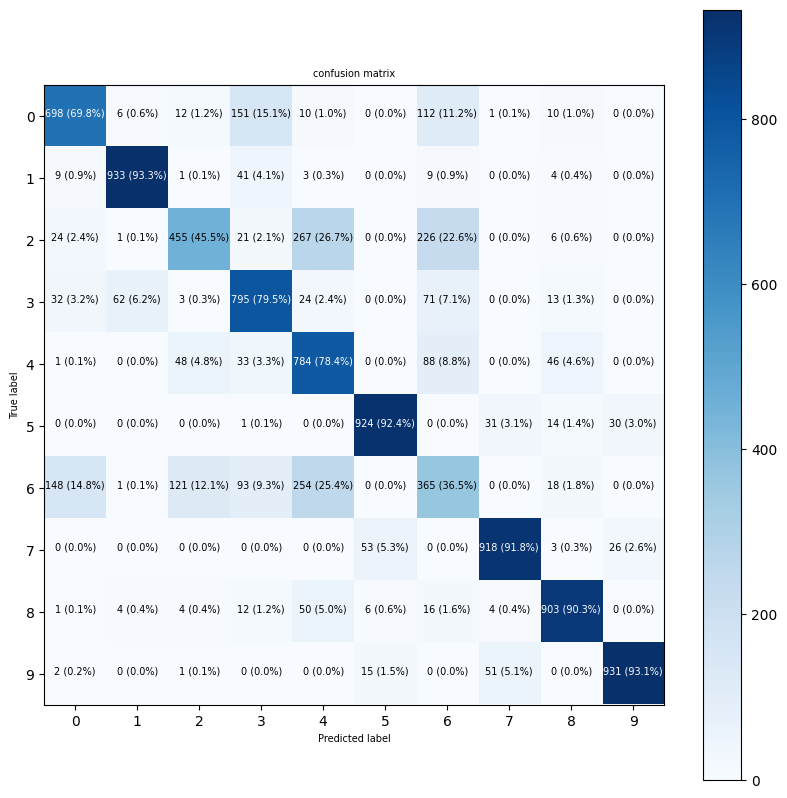

In [ ]:
plot_confusion_matrix(y_true=test_labels,y_pred=y_preds,text_size=7)

In [ ]:
#plotting random images
import random

def plot_random_image(model,images,true_labels,classes):
  random_index=random.randint(0,len(images))
  random_image=images[random_index]
  pred_prob=model.predict(random_image.reshape(1,28,28))
  pred_label=classes[pred_prob.argmax()]
  true_label=classes[true_labels[random_index]]

  plt.imshow(random_image,cmap=plt.cm.binary)

  #changing the color of title bases on the prediction. i.e red or green

  if pred_label==true_label:
    color="green"
  else:
    color="red"

  # add xlabel. prediction/true label
  percentage=tf.reduce_max(pred_prob)*100
  plt.xlabel(f"prediction:{pred_label} with {percentage:.2f}%\ntrue label:{true_label}",color=color)
  plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


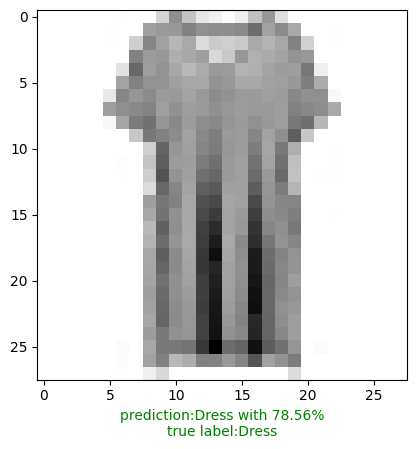

In [ ]:
plot_random_image(model_13,test_data_norm,test_labels,labels_name)

what pattern out model is actually learning

In [ ]:
model_13.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
# find the layers of our most recent model
model_13.layers

[<Flatten name=flatten_8, built=True>,
 <Dense name=dense_50, built=True>,
 <Dense name=dense_51, built=True>,
 <Dense name=dense_52, built=True>]

In [ ]:
model_13.layers[1]

<Dense name=dense_50, built=True>

In [ ]:
# get the pattern of our 1st hidden layer
weights,bias=model_13.layers[1].get_weights()
weights, weights.shape

(array([[-2.8788972 ,  0.03973095,  2.0137181 , -0.02753979],
        [-1.3261999 ,  4.8754334 , -0.42853686,  2.090396  ],
        [ 6.724073  ,  3.3331246 , -3.3862662 ,  0.12725416],
        ...,
        [ 0.93986845,  0.10697076,  0.60897046,  3.2956426 ],
        [-1.5792655 ,  2.946692  ,  2.5093594 ,  4.3163853 ],
        [-0.69725615, -2.2333224 , -0.67658406,  5.802871  ]],
       dtype=float32),
 (784, 4))

In [ ]:
bias,bias.shape

(array([10.180029  ,  0.18051945,  5.879641  ,  6.098983  ], dtype=float32),
 (4,))

bias vector is initialized to zero initially. bias dictated that how much the pattern within the corresponding weights matrix should influence the next layer.
